## Generate predictions from models

### Import packages 

In [4]:
import tensorflow as tf
import csv
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
tfkl = tf.keras.layers

### Import functions

In [23]:
import evaluation_functions

import importlib

importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

### Import data

#### State data

In [6]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')
state_final_test = np.loadtxt('../data/state_final_test.txt')

#### Country data

In [7]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')
country_final_test = np.loadtxt('../data/country_final_test.txt')

#### Combined data

In [8]:
combined_training = np.loadtxt('../data/combined_training.txt')
combined_test = np.loadtxt('../data/combined_test.txt')
combined_final_test = np.loadtxt('../data/combined_final_test.txt')

In [10]:
geos_key = np.load('../data/geos_key.npy')

### Import predictions

In [17]:
country_train_pred = np.loadtxt("../data/country_training_predictions.txt")
country_test_pred = np.loadtxt("../data/country_test_predictions.txt")
us_train_pred = np.loadtxt("../data/us_training_predictions.txt")
us_test_pred = np.loadtxt("../data/us_test_predictions.txt")
us_train_pred_f = np.loadtxt("../data/us_f_training_predictions.txt")
us_test_pred_f = np.loadtxt("../data/us_f_test_predictions.txt")
lc_test_pred = np.loadtxt("../data/lc_forecasts.csv", delimiter=",")

Plot MSEs by age

In [33]:
lc_predictions_us = lc_test_pred[lc_test_pred[:,0] == 87]
actual_us_test = country_test[country_test[:,0] == 87] 
country_test_pred_us_only = country_test_pred[country_test_pred[:,0] == 87]

In [32]:
print(us_test_pred)
print(actual_us_test)

[[8.70000000e+01 0.00000000e+00 2.00600000e+03 0.00000000e+00
  5.21315401e-03]
 [8.70000000e+01 1.00000000e+00 2.00600000e+03 0.00000000e+00
  6.54494949e-03]
 [8.70000000e+01 0.00000000e+00 2.00600000e+03 1.00000000e+00
  1.64469855e-03]
 ...
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.80000000e+01
  4.11934614e-01]
 [8.70000000e+01 0.00000000e+00 2.01500000e+03 9.90000000e+01
  3.70904595e-01]
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.90000000e+01
  4.32327837e-01]]
[[8.70000e+01 0.00000e+00 2.00600e+03 0.00000e+00 6.33600e-03]
 [8.70000e+01 1.00000e+00 2.00600e+03 0.00000e+00 7.71300e-03]
 [8.70000e+01 0.00000e+00 2.00600e+03 1.00000e+00 4.44000e-04]
 ...
 [8.70000e+01 1.00000e+00 2.01500e+03 9.80000e+01 3.99699e-01]
 [8.70000e+01 0.00000e+00 2.01500e+03 9.90000e+01 3.55903e-01]
 [8.70000e+01 1.00000e+00 2.01500e+03 9.90000e+01 4.40166e-01]]


In [34]:
lc_mse, lc_rmse, lc_rrmse = evaluation_functions.calculate_error_by_category(lc_predictions_us, actual_us_test, feature_index=3) # 3 is age 
us_dl_mse, us_dl_rmse, us_dl_rrmse = evaluation_functions.calculate_error_by_category(us_test_pred, actual_us_test, feature_index=3) 
country_mse, country_rmse, country_rrmse = evaluation_functions.calculate_error_by_category(country_test_pred_us_only, actual_us_test, feature_index=3) 

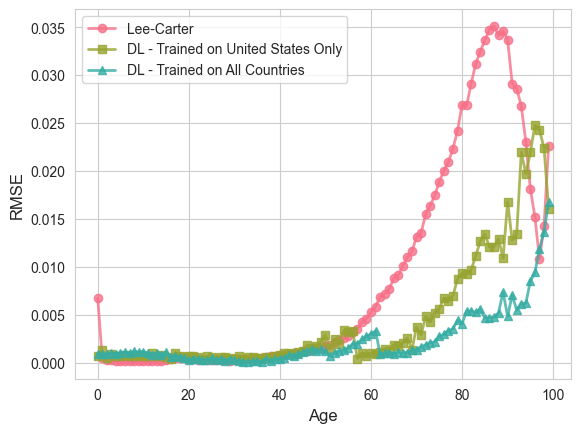

In [35]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(lc_rmse.items()))
keys2, values2 = zip(*sorted(us_dl_rmse.items()))
keys3, values3 = zip(*sorted(country_rmse.items()))
#keys4, values4 = zip(*sorted(com_rmse.items()))

# Plot the data
plt.plot(keys1, values1, label="Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
plt.plot(keys2, values2, label="DL - Trained on United States Only", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
plt.plot(keys3, values3, label="DL - Trained on All Countries", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
#plt.plot(keys4, values4, label="DL - Trained on All States and Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(fontsize=10, loc='best')

#plt.savefig("../results/US_rsme_over_age_0_to_60.pdf", format="pdf")

# Show the plot
plt.show()

RRMSE

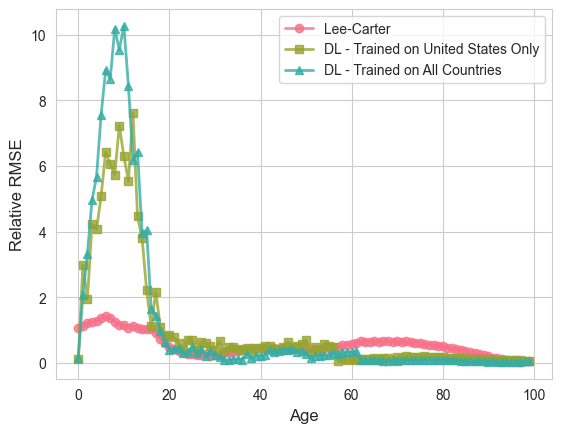

In [36]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(lc_rrmse.items()))
keys2, values2 = zip(*sorted(us_dl_rrmse.items()))
keys3, values3 = zip(*sorted(country_rrmse.items()))
#keys4, values4 = zip(*sorted(com_rrmse.items()))

# Plot the data
plt.plot(keys1, values1, label="Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
plt.plot(keys2, values2, label="DL - Trained on United States Only", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
plt.plot(keys3, values3, label="DL - Trained on All Countries", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
#plt.plot(keys4, values4, label="DL - Trained on All States and Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Relative RMSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(fontsize=10, loc='best')

plt.savefig("../results/US_rrsme_over_age.pdf", format="pdf")

# Show the plot
plt.show()

#### RRMSE by year

In [142]:
import evaluation_functions

importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

Issue here. I believe LC model is trained on sexes individually... and this figure is a summary of both - could try DL model only on 1 sex. Need to sort this out.

In [37]:
lc_mse, lc_rmse, lc_rrmse = evaluation_functions.calculate_error_by_category(lc_predictions_us, actual_us_test, feature_index=2) # 2 is year 
us_dl_mse, us_dl_rmse, us_dl_rrmse = evaluation_functions.calculate_error_by_category(us_test_pred, actual_us_test, feature_index=2) 
country_mse, country_rmse, country_rrmse = evaluation_functions.calculate_error_by_category(country_test_pred_us_only, actual_us_test, feature_index=2) 

In [85]:
# lc_mse, lc_rmse, lc_rrmse = evaluation_functions.calculate_error_by_category_lc(lc_predictions_new, combined_test_new, feature_index=2) # 2 is year in test_data
# ga_dl_mse, ga_dl_rmse, ga_dl_rrmse = evaluation_functions.calculate_error_by_category(state_test_prepped_new, model_state_new, feature_index=0) # 0 is year for tensors
# state_mse, state_rmse, state_rrmse = evaluation_functions.calculate_error_by_category(state_test_prepped_new, model_state, feature_index=0) 
# com_mse, com_rmse, com_rrmse = evaluation_functions.calculate_error_by_category(state_test_prepped_new, model_combined, feature_index=0)

[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]
[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]
[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]


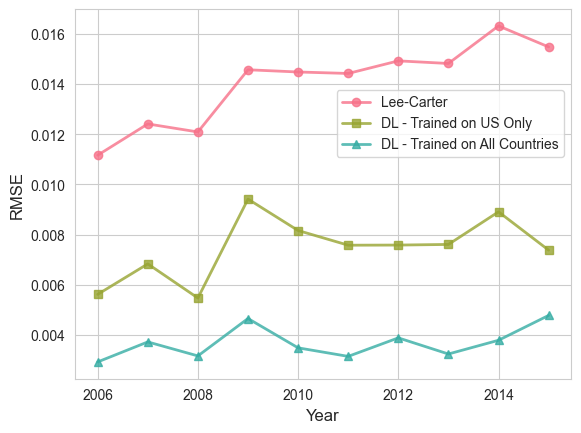

In [39]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(lc_rmse.items()))
keys2, values2 = zip(*sorted(us_dl_rmse.items()))
keys3, values3 = zip(*sorted(country_rmse.items()))

# Plot the data
plt.plot(keys1, values1, label="Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
plt.plot(keys2, values2, label="DL - Trained on US Only", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
plt.plot(keys3, values3, label="DL - Trained on All Countries", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
#plt.plot(keys4, values4, label="DL - Trained on US States and Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(
    fontsize=10,
    loc='upper right',
    bbox_to_anchor=(1, 0.8)  # shift up a bit
)


#plt.savefig("../results/US_rsme_over_time.pdf", format="pdf")

# Show the plot
plt.show()

### Figures with actual mortality rates plotted against predictions

Plot of actual and fitted/forecasted mortality rates (in training and test sets) for selected ages (0, 20, 40, 60, 80) for US females 

In [48]:
print(lc_predictions_us)
print(country_test_pred_us_only)

[[8.70000000e+01 0.00000000e+00 2.00600000e+03 0.00000000e+00
  1.14121198e-02]
 [8.70000000e+01 0.00000000e+00 2.00600000e+03 1.00000000e+00
  8.41506665e-04]
 [8.70000000e+01 0.00000000e+00 2.00600000e+03 2.00000000e+00
  5.30237004e-04]
 ...
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.70000000e+01
  3.67615094e-01]
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.80000000e+01
  3.83921463e-01]
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.90000000e+01
  4.02010165e-01]]
[[8.70000000e+01 0.00000000e+00 2.00600000e+03 0.00000000e+00
  4.16677445e-03]
 [8.70000000e+01 1.00000000e+00 2.00600000e+03 0.00000000e+00
  7.14288419e-03]
 [8.70000000e+01 0.00000000e+00 2.00600000e+03 1.00000000e+00
  8.27048731e-04]
 ...
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.80000000e+01
  3.76791805e-01]
 [8.70000000e+01 0.00000000e+00 2.01500000e+03 9.90000000e+01
  3.48327786e-01]
 [8.70000000e+01 1.00000000e+00 2.01500000e+03 9.90000000e+01
  4.01437670e-01]]


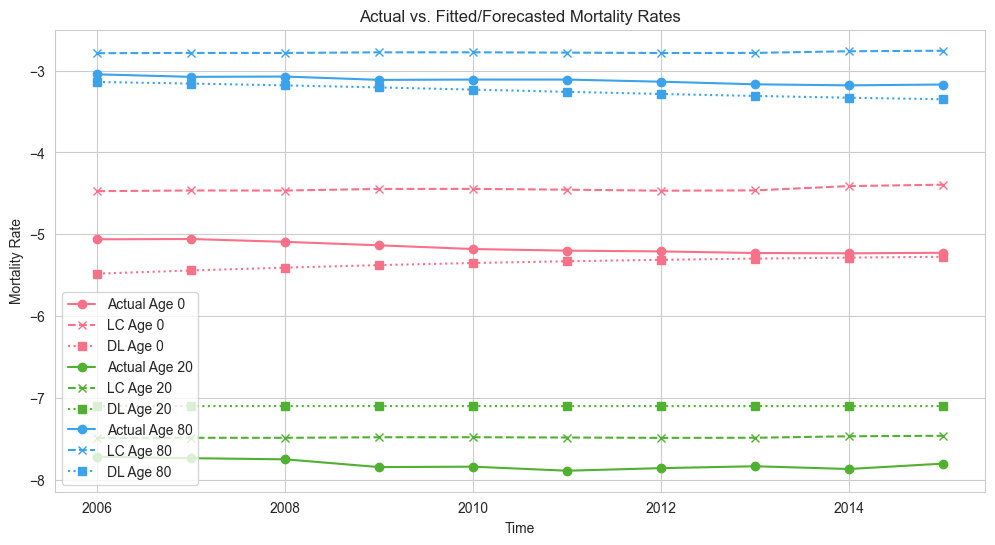

In [50]:
selected_ages = [0, 20, 80]
time_col = 2
mort_col = 4
gender_col = 1
years = np.unique(actual_us_test[:, time_col])

# aesthetics
sns.set_style("whitegrid")
colors = sns.color_palette("husl", len(selected_ages))

plt.figure(figsize=(12, 6))

for idx, age in enumerate(selected_ages):
    # Filter data for the given age
    actual_subset = actual_us_test[(actual_us_test[:, 3] == age) & (actual_us_test[:, gender_col] == 0)]
    predicted_subset = lc_predictions_us[(lc_predictions_us[:, 3] == age) & (lc_predictions_us[:, gender_col] == 0)]
    predicted_subset_dl = country_test_pred_us_only[(country_test_pred_us_only[:, 3] == age) & (country_test_pred_us_only[:, gender_col] == 0)]

    # Sort by time to ensure proper plotting
    actual_subset = actual_subset[np.argsort(actual_subset[:, time_col])]
    predicted_subset = predicted_subset[np.argsort(predicted_subset[:, time_col])]
    predicted_subset_dl = predicted_subset_dl[np.argsort(predicted_subset_dl[:, time_col])]

    # Extract values for plotting
    time_series = actual_subset[:, time_col]
    actual_rates = np.log(actual_subset[:, mort_col])
    predicted_rates = np.log(predicted_subset[:, mort_col])
    predicted_rates_dl = np.log(predicted_subset_dl[:, mort_col])

    # Plot actual and predicted lines
    plt.plot(time_series, actual_rates, label=f'Actual Age {age}', linestyle='-', marker='o', color=colors[idx])
    plt.plot(time_series, predicted_rates, label=f'LC Age {age}', linestyle='--', marker='x', color=colors[idx])
    plt.plot(time_series, predicted_rates_dl, label=f'DL Age {age}', linestyle=':', marker='s', color=colors[idx])


# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Mortality Rate')
plt.title('Actual vs. Fitted/Forecasted Mortality Rates')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# now we need to get fitted rates for 1959-2005
# for this we'll just run the first part of the lee-carter model (without the forecasting step)


75 Year Forecasts with Uncertainty for US Females